## Introduction

In this notebook, we are going to analyze and build machine learning model to predict which passengers would have survived the Titanic shipwreck disaster. Full description of this competition project can be seen at https://www.kaggle.com/c/titanic. The given dataset consists of several information of every passenger in the ship, e.g. ticket number, ticket class, sex, age, port of embarkation etc. 

The aim of this project is to build a model which can predict which passengers would have survived the shipwreck. There are only 2 target values: survived (1) or not survived (0), hence it is a binary classification problem. Apart from the modelling objective, we can also find the factor(s) which mostly affect the survivability of the passenger. 

## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Download dataset from shared google drive file.

In [2]:
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd
import os
gdd.download_file_from_google_drive(file_id='1i7lfMLfRhtkX_Qhn72fN8GDyIhnGpZ7S',
                                    dest_path='./Titanic.zip',
                                    unzip=True)

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Dropping Some Columns

Some of the columns are the primary key of the data (all the values are unique for each record). These columns are PassengerId and Name. The Ticket column also has a lot of unique values (681) and might not contain information needed for prediction task since it is only act as an identifier. We should drop PassengerId and Ticket columns but keep the Name column for later purpose.

In [4]:
print('PassengerId unique values : %d' % (len(df['PassengerId'].unique())))
print('Name unique values : %d' % (len(df['Name'].unique())))
print('Ticket unique values : %d' % (len(df['Ticket'].unique())))

PassengerId unique values : 891
Name unique values : 891
Ticket unique values : 681


In [3]:
df = df.drop(columns=['PassengerId', 'Ticket'])

## Exploratory Data Analysis (EDA)

In [4]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Several columns have missing values: Age, Cabin, Embarked. We will deal with that later.

### Distribution plot of each categorical and discrete variable

Text(0.5, 1.0, 'Distribution of passenger survivability')

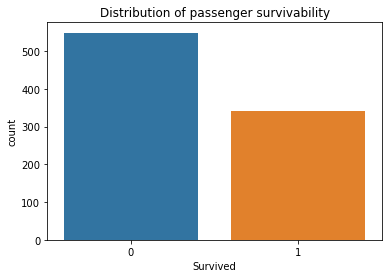

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived',data=df)
plt.title('Distribution of passenger survivability')

Text(0.5, 1.0, 'Distribution of passenger ticket class')

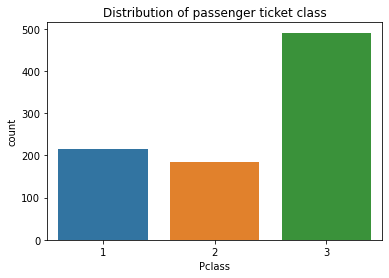

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass',data=df)
plt.title('Distribution of passenger ticket class')

Text(0.5, 1.0, 'Distribution of passenger sex')

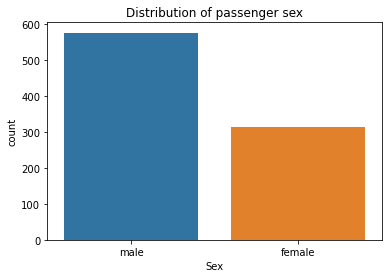

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex',data=df)
plt.title('Distribution of passenger sex')

Text(0.5, 1.0, 'Distribution of passenger siblings/spouse relationship')

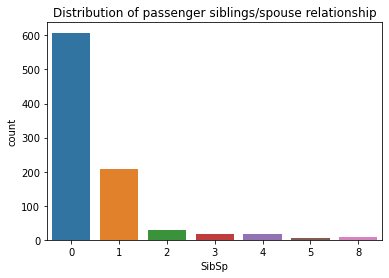

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='SibSp',data=df)
plt.title('Distribution of passenger siblings/spouse relationship')

Text(0.5, 1.0, 'Distribution of passenger parents/children relationship')

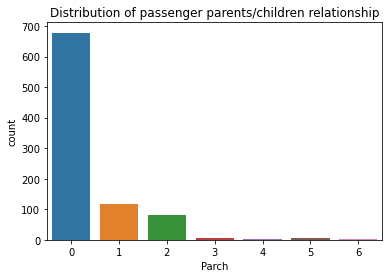

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Parch',data=df)
plt.title('Distribution of passenger parents/children relationship')

Text(0.5, 1.0, 'Distribution of passenger embarkation port')

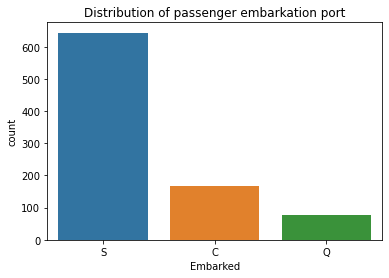

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked',data=df)
plt.title('Distribution of passenger embarkation port')

Several remarks can be drawn from here:
- More than half of total passengers were not survived.
- Most of the passengers take class 3 ticket .
- Most of the passengers are male.
- Most of the passengers aboard the ship individually (without siblings).
- Most of the passengers aboard the ship from Southampton.

### Distribution plot of each continuous numerical variable.

Text(0.5, 0.98, 'Distribution of passenger age')

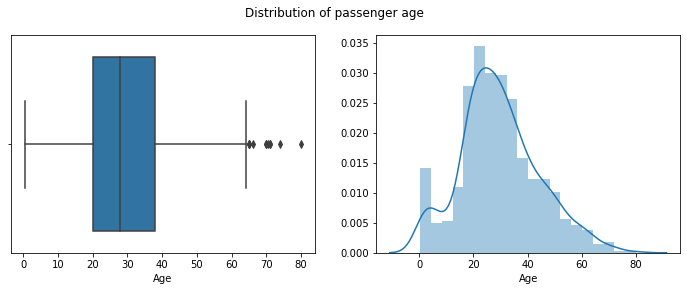

In [34]:
f, (ax1, ax2) = plt.subplots(figsize=(12,4), nrows=1, ncols=2)
sns.boxplot(df['Age'].dropna(), ax=ax1)
sns.distplot(df['Age'].dropna(), ax=ax2)
f.suptitle('Distribution of passenger age')

Text(0.5, 0.98, 'Distribution of passenger fare')

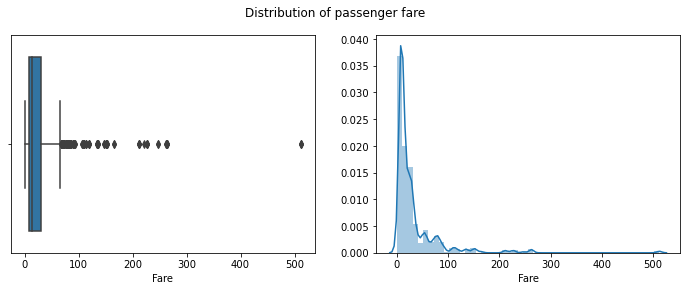

In [22]:
f, (ax1, ax2) = plt.subplots(figsize=(12,4), nrows=1, ncols=2)
sns.boxplot(df['Fare'].dropna(), ax=ax1)
sns.distplot(df['Fare'].dropna(), ax=ax2)
f.suptitle('Distribution of passenger fare')

In [15]:
df[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Several remarks can be drawn from here:
- The average age of Titanic passenger is about 30. The age distribution has little skewness to right.
- The passenger fare distribution is quite extreme. 75% of the fare values are between 0 - 31. The remaining fare has very high value up to 512 (not sure what currency used for this fare. It can be Dollar or Pound). 

### Relation between several variables

Passenger fare might be associated with ticket class since the class represents economic grade among the passengers as can be seen below. We also try to find relationship between the passenger fare and embarkation port. 

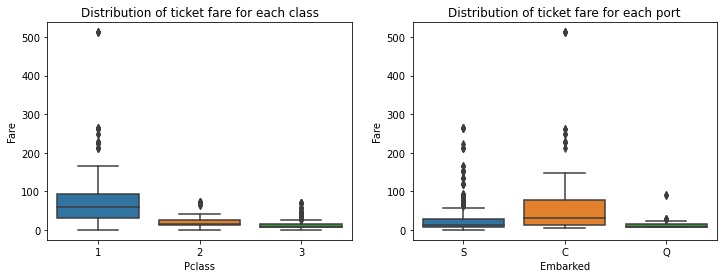

In [21]:
f, (ax1, ax2) = plt.subplots(figsize=(12,4), nrows=1, ncols=2)
sns.boxplot(x='Pclass',y='Fare',data=df, ax=ax1)
sns.boxplot(x='Embarked',y='Fare',data=df, ax=ax2)
ax1.title.set_text('Distribution of ticket fare for each class')
ax2.title.set_text('Distribution of ticket fare for each port')

Several remarks:
- Passenger class of 1, 2, 3 can be associated with high, medium, low grade respectively based on its fare.
- It seems that passengers who aboard the ship from Cherbourg were charged with higher fare.

Next we can try to find factor(s) which affect the survivability of the passenger by plotting Survived column values with each feature.

Text(0.5, 0.98, 'Passenger survivability based on each categorical variable')

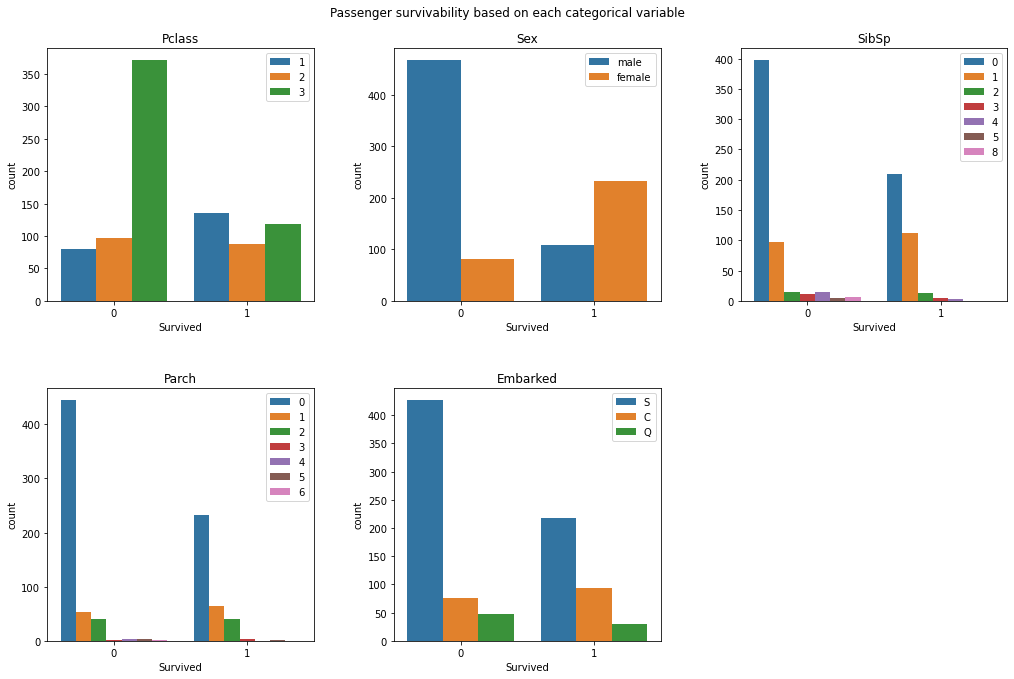

In [39]:
cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
fig = plt.figure(figsize=(15,10))
for c,i in zip(cols, range(1,6)):
    ax = fig.add_subplot(2,3,i)
    sns.countplot(x='Survived',hue=c,data=df)
    ax.set_title(c)
    ax.legend(loc="upper right") 
fig.tight_layout(pad=4.0) 
fig.suptitle('Passenger survivability based on each categorical variable')

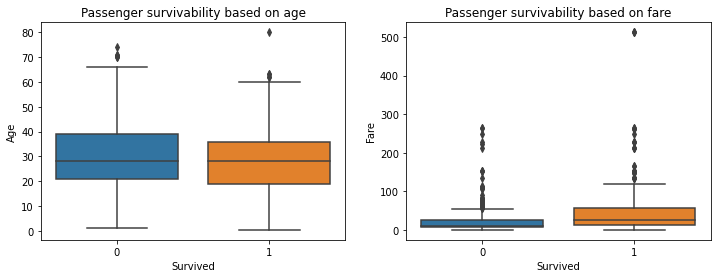

In [35]:
f, (ax1, ax2) = plt.subplots(figsize=(12,4), nrows=1, ncols=2)
sns.boxplot(x='Survived',y='Age',data=df, ax=ax1)
sns.boxplot(x='Survived',y='Fare',data=df, ax=ax2)
ax1.title.set_text('Passenger survivability based on age')
ax2.title.set_text('Passenger survivability based on fare')

Several remarks:
- It seems that survivability for passenger class 1 (which is high economic grade) is higher than the other class.  
- Survivability of female passenger is clearly higher than male passenger.
- Other variables have no clear effect to the passenger survivability, but passenger age seems has quite little effect (younger passenger tend to survive).

### Hypothesis based on EDA

If we recall again the history of Titanic, in the final hours of the shipwreck, the lifeboats began to be launched with orders of women and children first. This explains why did many of the female passengers survived more than the male passengers. We can also roughly assume that class 1 passengers were prioritized over the other classes. It might be that many important and prominent persons/families were in the class 1, hence they were prioritized to the lifeboats. Several names can be noticed here.

In [5]:
df[(df['Name'].str.contains('Duff Gordon')) | (df['Name'].str.contains('Countess')) | (df['Fare'] == df['Fare'].max())]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,NaN,C
556,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,39.6000,A16,C
599,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,56.9292,A20,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B101,C
759,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,86.5000,B77,S


## Handling Missing Values

In [6]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

We can see that the Cabin column has so much NA values, more than 75% of the records to be precise. Filling out this numerous NA values will be worthless, hence we should drop this column.

In [4]:
df = df.drop(columns='Cabin')

There are only 2 NA values in Embarked column which is a categorical variable hence we can 'safely' fill them with the most frequent value of the column.

In [5]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Embarked'] = imp.fit_transform(np.array(df['Embarked']).reshape(-1,1))

### Strategy for Age column: KNN imputation

Age columns has so many NA values (approximately 20% of the records). However, it is not wise to drop this column because passenger age might contain crucial information about passenger survivability. We will try to fill the missing values using nearest neighbor (KNN) imputation.

In [18]:
from sklearn.impute import KNNImputer
temp = df.copy()
temp = pd.concat([temp,pd.get_dummies(temp[['Sex','Embarked']])],axis=1)
temp = temp.drop(columns=['Sex','Embarked'])

imputer = KNNImputer(n_neighbors=8)
wel = DataFrame(imputer.fit_transform(temp.drop(columns=['Name'])))
df1 = df.copy()
df1['Age'] = wel[2]
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.75,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,30.0000,C


One drawback of KNN imputation on this data is several passengers from same family whose age is unknown are imputed with same age. Example can be seen for Sage family in the table below.

In [24]:
df1[df1['Name'].str.contains('Sage,')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
159,0,3,"Sage, Master. Thomas Henry",male,34.0,8,2,69.55,S
180,0,3,"Sage, Miss. Constance Gladys",female,34.0,8,2,69.55,S
201,0,3,"Sage, Mr. Frederick",male,34.0,8,2,69.55,S
324,0,3,"Sage, Mr. George John Jr",male,34.0,8,2,69.55,S
792,0,3,"Sage, Miss. Stella Anna",female,34.0,8,2,69.55,S
846,0,3,"Sage, Mr. Douglas Bullen",male,34.0,8,2,69.55,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,34.0,8,2,69.55,S


### Strategy for Age column: median age based on the passenger title name

Another approach which might be more sensible is filling the missing age values using median value of the corresponding passenger title name. Every passenger's name contains title such as 'Miss', 'Mr', 'Mrs' etc. This title information can be used to infer the age of the corresponding passenger. We use median value because the age distributions among passenger title are quite skewed. 

Text(0.5, 0.98, 'Age distribution among passenger title name')

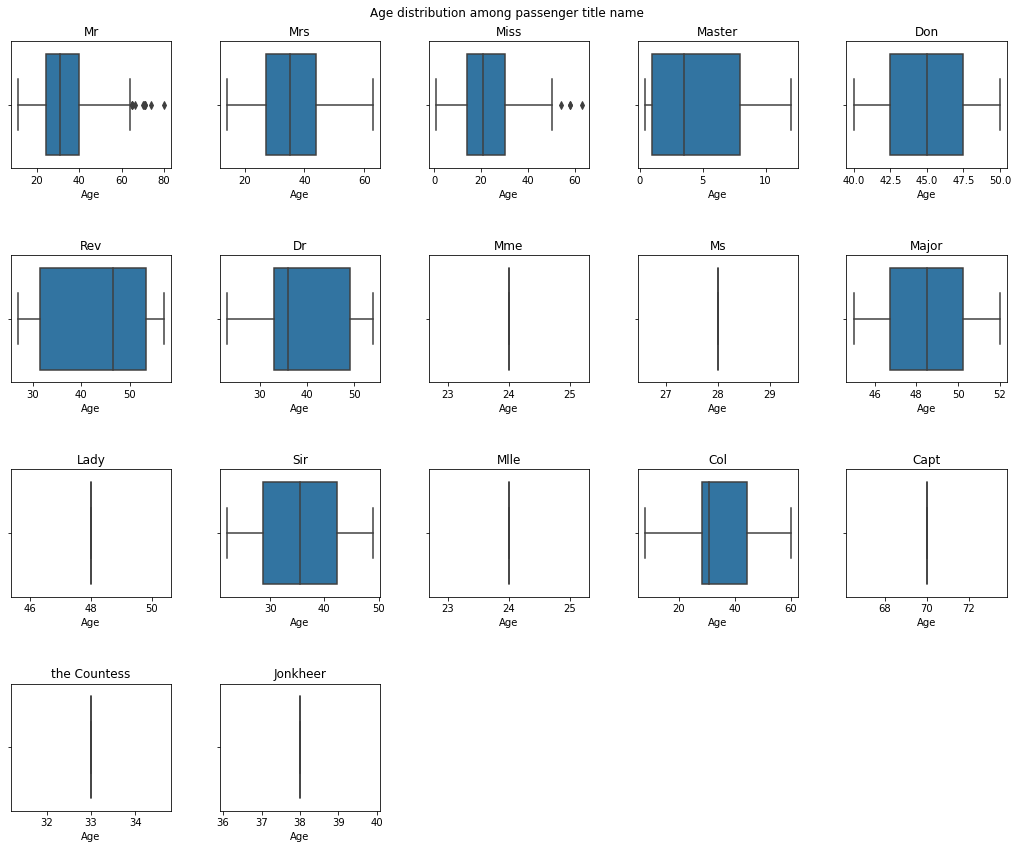

In [29]:
c = df['Name'].str.split(', ').str[1]
title = c.str.split('.').str[0]
Title = title.unique()

fig = plt.figure(figsize=(15,15))
for c,i in zip(Title, range(1,18)):
    df0=df[df['Name'].str.contains(c)].dropna()
    ax = fig.add_subplot(5,5,i)
    sns.boxplot(df0['Age'])
    ax.set_title(c)
fig.tight_layout(pad=4.0)
fig.suptitle('Age distribution among passenger title name')

In [6]:
def age_pred(title):
    return (df[df['Name'].str.contains(title)]['Age'].median())

def age_predict(df):
    c = df['Name'].str.split(', ').str[1]
    title = c.str.split('.').str[0]
    df['title'] = title
    df.loc[df['Age'].isna(),'Age'] = df[df['Age'].isna()]['title'].apply(age_pred)
    del df['title']
    return(df)

In [7]:
df2 = age_predict(df)
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


Finally, all of the NA values have been handled.

In [8]:
df2.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Building Predictive Models

### Data preparation

Before building the predictive model, training data must be prepared. We no longer need Name column for modelling purpose so we can drop it. Categorical columns (Sex and Embarked) must be encoded into dummy variables because sklearn package cannot handle string categorical data. In this classification task, we will use accuracy as the metric.

In [9]:
data = df2.drop(columns=['Name'])
data = pd.concat([data,pd.get_dummies(data[['Sex','Embarked']])],axis=1)
data = data.drop(columns=['Sex','Embarked'])
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,21.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
X = data.iloc[:,1:12]
y = data.iloc[:,0]

### Predictive model: Decision Tree

For the first model, we will use decision tree classifier from sklearn package. Feature scaling is not necessarily needed for tree classifier. We will perform hyperparameter tuning using grid search + cross validation method.

In [11]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth' : [4, 5, 6, 7, 8], 'ccp_alpha' : [0, 0.001, 0.002, 0.003, 0.004, 0.005]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X, y)
print('Best hyperparameter: ', grid.best_params_)
print('Best cross validation score: ', grid.best_score_)

Best hyperparameter:  {'ccp_alpha': 0.003, 'max_depth': 6}
Best cross validation score:  0.8237900947837549


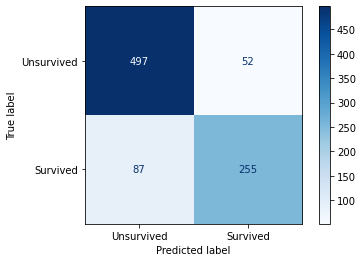

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid, X, y, display_labels=['Unsurvived','Survived'], cmap=plt.cm.Blues)

For decision tree classifier, our best accuracy in cross validation scheme is 0.824 with hyperparameters ccp_alpha = 0.003 and max_depth = 6. Also shown here the confusion matrix that results from implementing tree classifier to the training data.

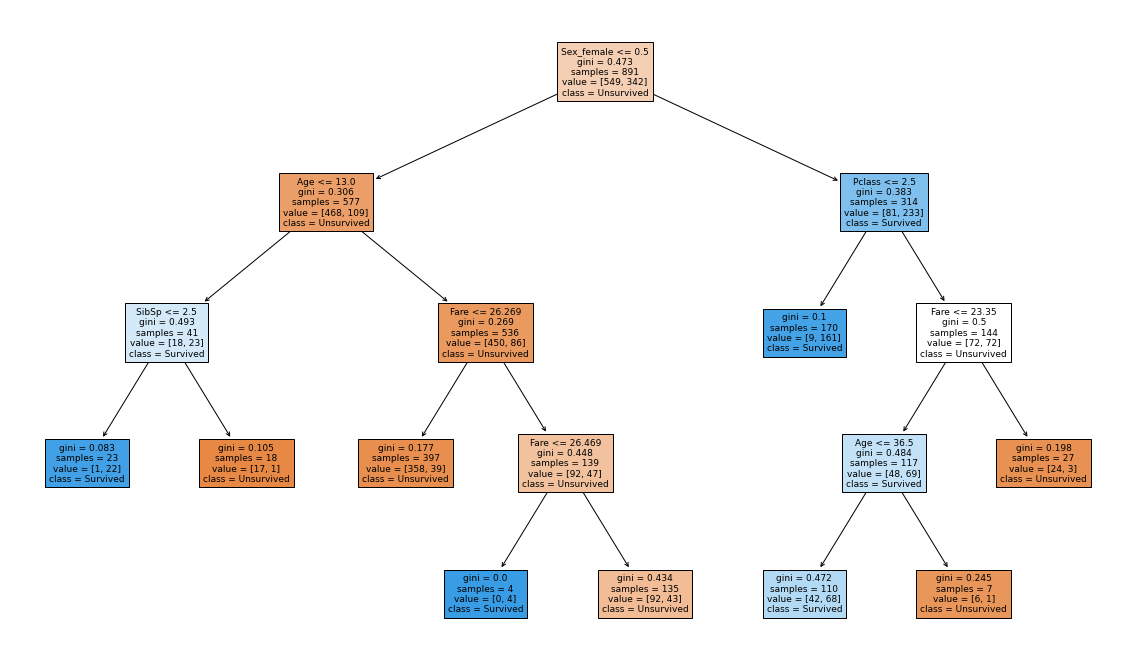

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,12))
plot_tree(DecisionTreeClassifier(**grid.best_params_).fit(X,y), feature_names=data.drop(columns='Survived').columns, 
          class_names=['Unsurvived','Survived'], filled=True, fontsize=9)
plt.show()

Our decision tree model can be visualized as can be seen from the above figure. We can see that the first feature used for splitting the data is passenger sex. This confirms that passenger sex is important factor for determining the survivability of the passenger. Other features that appear quite often in this tree plot are Age, Pclass, and Fare.

### Predictive model: Support Vector Machine

For the next model, we will use support vector classifier (SVC) from sklearn package. Feature scaling is needed for this classifier and we will use StandardScaler. Hyperparameter tuning was done using grid search + cross validation method.

In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", StandardScaler()), ("svc", SVC())])
param_grid = {'svc__C': [0.3, 0.4, 0.5, 0.6, 0.7], 'svc__gamma' : [0.01, 0.05, 0.1, 0.5, 1]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X,y)
print('Best hyperparameter: ', grid.best_params_)
print('Best cross validation score: ', grid.best_score_)

Best hyperparameter:  {'svc__C': 0.6, 'svc__gamma': 0.1}
Best cross validation score:  0.8282593685267716


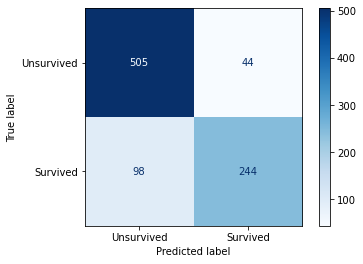

In [14]:
plot_confusion_matrix(grid, X, y, display_labels=['Unsurvived','Survived'], cmap=plt.cm.Blues)

For support vector classifier, our best accuracy in cross validation scheme is 0.828 with hyperparameters C = 0.6 and gamma = 0.1. Also shown here the confusion matrix that results from implementing SVC to the training data. The SVC score is slightly higher (around 0.5%) than the tree classifier. 

### Predictive model: Random Forest

For the next model, we will use random forest classifier from sklearn package. Feature scaling is not necessarily needed as random forest is basically an ensemble of tree classifier. Hyperparameter tuning was done using grid search + cross validation method.

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0,n_jobs=4)
param_grid = {'n_estimators': [200, 300, 400], 'max_depth' : [8, 9, 10]}
grid = GridSearchCV(forest, param_grid=param_grid, cv=5)
grid.fit(X,y)
print('Best hyperparameter: ', grid.best_params_)
print('Best cross validation score: ', grid.best_score_)

Best hyperparameter:  {'max_depth': 9, 'n_estimators': 300}
Best cross validation score:  0.8271985437197916


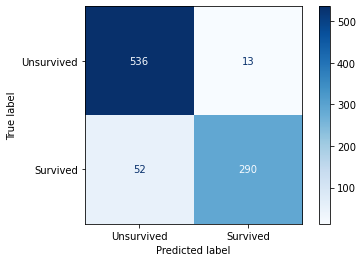

In [16]:
plot_confusion_matrix(grid, X, y, display_labels=['Unsurvived','Survived'], cmap=plt.cm.Blues)

For random forest classifier, our best accuracy in cross validation scheme is 0.827 which is slightly lower than the SVC ones. We can improve this score by employing feature selection (dropping unnecessary features). This can easily be done because random forest provide straightforward method for feature selection by calculating feature importances.

### Improvement: Random Forest with feature selection

<AxesSubplot:xlabel='feature score', ylabel='features'>

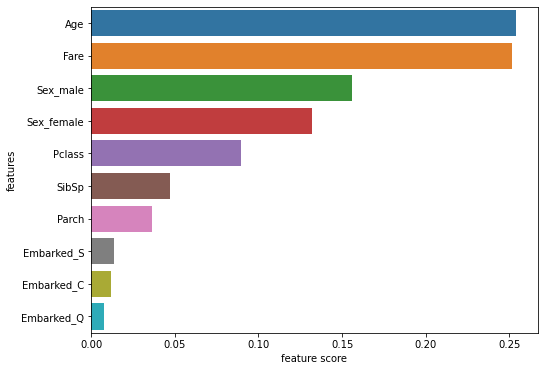

In [17]:
forest.fit(X, y)
indices = np.argsort(forest.feature_importances_)[::-1]
cc = DataFrame({'feature score':Series(forest.feature_importances_),'features':Series(X.columns)})    
plt.figure(figsize=(8,6))
sns.barplot(x='feature score',y='features',data=cc.head(50).sort_values(by='feature score',ascending=False))

It turns out that Embarked column has very low importance score compared to the other columns. Hence, we can drop this column and refit the model.

In [18]:
new_col = np.array(Series(X.columns[indices]).head(7))
X_new = X[new_col]
grid.fit(X_new,y)
print('Best hyperparameter: ', grid.best_params_)
print('Best cross validation score: ', grid.best_score_)

Best hyperparameter:  {'max_depth': 8, 'n_estimators': 200}
Best cross validation score:  0.8305316678174629


Finally, we get the best accuracy score 0.831 (0.27% higher than SVC score) for random forest classifier with hyperparameters max_depth = 8 and n_estimators = 200.

## Implementing to the Test Data

In [53]:
dt = pd.read_csv('test.csv')
dt

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [107]:
dt.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Before we can implement our model, missing values from test data have to be handled in the same manner as in training data:
- Drop Cabin column
- Impute NA values in Age column by the median value of its corresponding passenger title name

Unfortunately, there is one NA value in Fare column. Judging by its number of NA values, we can 'safely' fill them with the median value of Fare column from training data.

In [54]:
dt = dt.drop(columns=['PassengerId','Ticket','Cabin'])
dt = age_predict(dt)
dt.loc[dt['Fare'].isna(),'Fare'] = df[df['Pclass'] == dt[dt['Fare'].isna()]['Pclass'].values[0]]['Fare'].median()
dt

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,31.0,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,31.0,0,0,8.0500,S


In [40]:
dt.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

After handling missing values, we proceed to the prediction step. We choose our best predictive model which is random forest classifier with tuned hyperparameters (max_depth = 8 and n_estimators = 200). Feature selection also performed to the test data.

In [56]:
data_test = dt.drop(columns=['Name'])
data_test = pd.concat([data_test,pd.get_dummies(data_test[['Sex','Embarked']])],axis=1)
data_test = data_test.drop(columns=['Sex','Embarked'])
X_test = data_test[new_col]

y_pred = grid.predict(X_test)
final = pd.concat([dt, Series(y_pred,name='Survived')], axis=1)
final

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,31.0,0,0,8.0500,S,0
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,1
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,0
416,3,"Ware, Mr. Frederick",male,31.0,0,0,8.0500,S,0


Finally, we have predicted which passengers would have survived the Titanic shipwreck using our best predictive model based on the training data. The final predicted test data can be exported to CSV file and submitted to Kaggle.

In [57]:
final.to_csv("output.csv") 